### Activity 5.01: Reading Tabular Data from a Web Page and Creating DataFrames



In [1]:
# Ignore all Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Make a get requests to Wikipedia using Requests

import requests
page= requests.get ('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')
print (f'Requests status Code:',page.status_code)


Requests status Code: 200


In [3]:
# Read the page using bs4

from bs4 import BeautifulSoup
soup = BeautifulSoup(page.text,'html.parser') #Read the page from requests response using html parser

In [4]:
# Count the no of tablular data 

table = soup.findAll("table")  #Scan all the table
print (f'Total Tables:',len(table)) 

Total Tables: 7


In [5]:
# Find the right table by finding no of rows and columns for each table

cntr = 0 
num_cols = 0

for data in table:
    cntr += 1  #Increment the Counter to display Table index
    rows = data.find_all('tr') #Find all the tr to find no of rows
    
    for row in rows: #To find no of columns loop through each row
        cols = row.find_all(['th']) #Find all the header
        num_cols = max(num_cols, len(cols)) # Get the max of the count

    print (f'Table {cntr}: \n No of rows: {len(rows)} \n No of columns: {num_cols}')

Table 1: 
 No of rows: 2 
 No of columns: 0
Table 2: 
 No of rows: 1 
 No of columns: 0
Table 3: 
 No of rows: 212 
 No of columns: 6
Table 4: 
 No of rows: 10 
 No of columns: 6
Table 5: 
 No of rows: 9 
 No of columns: 6
Table 6: 
 No of rows: 14 
 No of columns: 6
Table 7: 
 No of rows: 2 
 No of columns: 6


From the above we can identity that we need to use Table 3

In [6]:
import pandas as pd
import re

# Define the regular expression pattern for removing unwanted chars in year
pattern = r'\[n\s+\d+\]'

rows = table[2].find_all('tr')[2:]  # Get all the rows other than header for the table 3

# Extract data
data = []
for row in rows:
    cols = [re.sub(pattern, '',col.get_text(strip=True)).replace(',', '') for col in row.find_all('td')]  #Extract human readable text from td tag and replace value like [n 1], ","
    data.append(cols) #Append all the data
    
# Create main dataframe
df = pd.DataFrame(data, columns=[
    'Country', 'IMF_Forecast', 'IMF_Year',
    'WB_Estimate', 'WB_Year', 'UN_Estimate', 'UN_Year'
])

# Convert numeric columns
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Create separate dataframes
df_imf = df[['Country', 'IMF_Forecast', 'IMF_Year']]
df_wb = df[['Country', 'WB_Estimate', 'WB_Year']]
df_un = df[['Country', 'UN_Estimate', 'UN_Year']]

#Print different dataframe
print ("IMF Forecast \n")
print(df_imf.head (10))
print("\n")

print ("World Bank Forecast \n")
print(df_wb.head (10))
print("\n")

print ("United Nation Forecast \n")
print(df_un.head (10))
print("\n")



IMF Forecast 

          Country  IMF_Forecast  IMF_Year
0           World   115494312.0    2025.0
1   United States    30338000.0    2025.0
2           China    19535000.0    2025.0
3         Germany     4922000.0    2025.0
4           Japan     4390000.0    2025.0
5           India     4270000.0    2025.0
6  United Kingdom     3731000.0    2025.0
7          France     3284000.0    2025.0
8           Italy     2460000.0    2025.0
9          Canada     2331000.0    2025.0


World Bank Forecast 

          Country  WB_Estimate  WB_Year
0           World  105435540.0   2023.0
1   United States   27360935.0   2023.0
2           China   17794782.0   2023.0
3         Germany    4456081.0   2023.0
4           Japan    4212945.0   2023.0
5           India    3549919.0   2023.0
6  United Kingdom    3340032.0   2023.0
7          France    3030904.0   2023.0
8           Italy    2254851.0   2023.0
9          Canada    2140086.0   2023.0


United Nation Forecast 

          Country  UN_Estimate  

### Activity 6.01: Handling Outliers and Missing Data


In [9]:
# Reading CSV
df = pd.read_csv("visit_data.csv") #Read csv
df.head(5)

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [20]:
#Finding Duplicates

# Loop through each column and check for duplicates
for col in df.columns:
    duplicate_values = df[col][df[col].duplicated()] #Identity the unique duplicate values
    if not duplicate_values.empty:
        print(f"\nColumn '{col}' has {len(duplicate_values.unique())} duplicate values.") #Print the total duplicate values for the column
    else:
        print(f"\nColumn '{col}' has no duplicate values.")


Column 'id' has no duplicate values.

Column 'first_name' has 24 duplicate values.

Column 'last_name' has 5 duplicate values.

Column 'email' has no duplicate values.

Column 'gender' has 3 duplicate values.

Column 'ip_address' has no duplicate values.

Column 'visit' has 125 duplicate values.


In [24]:
#Finding Nan

# Loop through each column and check for Nan
for col in df.columns:
    null_values = df[col][df[col].isna()] #Identity the Null value
    if not null_values.empty:
        print(f"\nColumn '{col}' has {len(null_values.unique())} Nan values.") #Print the total Null values for the column
    else:
        print(f"\nColumn '{col}' has no Nan values.")


Column 'id' has no Nan values.

Column 'first_name' has 1 Nan values.

Column 'last_name' has 1 Nan values.

Column 'email' has no Nan values.

Column 'gender' has 1 Nan values.

Column 'ip_address' has no Nan values.

Column 'visit' has 1 Nan values.


In [ ]:
#Identity Outliers

from scipy import stats
import numpy as np

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]) #Select only visit

# Calculate Z-scores
z_scores = np.abs(stats.zscore(numeric_cols, nan_policy='omit'))

# Keep rows where all Z-scores are below 3
df_no_outliers = df[(z_scores < 3).all(axis=1)]

#Print the record count before and after removing outlier
print(f'Count before removing Outliers: {len(df)}')
print(f'Count after removing Outliers: {len(df_no_outliers)}')


Count before removing Outliers: 1000
Count after removing Outliers: 974


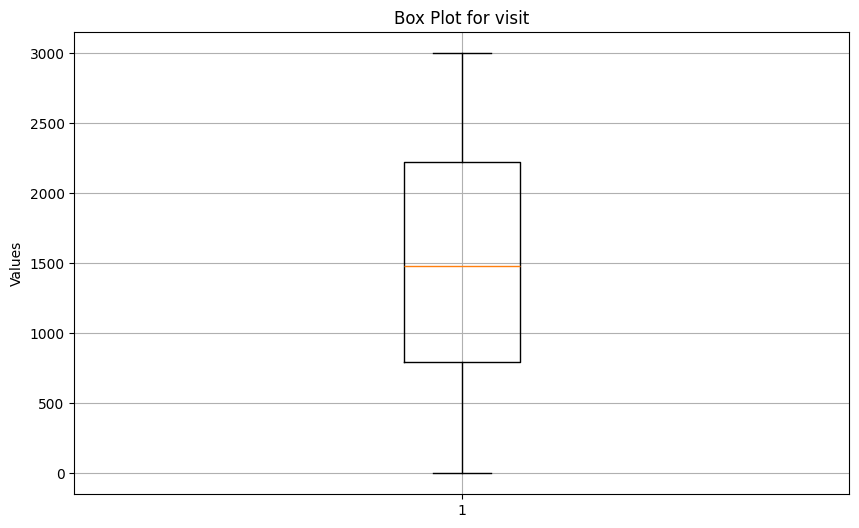

In [33]:
#Display the box plot for Numeric (Visit) Column
import matplotlib.pyplot as plt

#Box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df["visit"].dropna())
plt.title(f"Box Plot for visit")
plt.ylabel("Values")
plt.grid(True)
plt.show()

Observation: \
Form the Box Plot, we understand the most of the values are in between ~700 to ~2700

To remove Outliers, remove the values less than 100 and greater then 2900

In [34]:
# Remove Outliers 

# Keep only rows where visit is between 100 and 2900
df_no_outliers = df_no_outliers[(df_no_outliers['visit'] >= 100) & (df_no_outliers['visit'] <= 2900)]

#Print the record count before and after removing outlier
print(f'Count before removing Outliers: {len(df)}')
print(f'Count after removing Outliers: {len(df_no_outliers)}')

Count before removing Outliers: 1000
Count after removing Outliers: 923


### Assignment: Create SQL Lite DB & Insert data

In [36]:
import sqlite3

# Create SQlite DB and Connect
conn = sqlite3.connect("people.db")
cursor = conn.cursor()

# Create a table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS contacts (
        Name TEXT,
        Address TEXT,
        City TEXT,
        State TEXT,
        Zip TEXT,
        PhoneNumber TEXT
    )
''')

# Create Sample data list
data = [
    ("Alice Smith", "123 Maple St", "Boston", "MA", "02101", "617-123-4567"),
    ("Bob Johnson", "456 Oak St", "New York", "NY", "10001", "212-555-7890"),
    ("Carol White", "789 Pine St", "Chicago", "IL", "60601", "312-777-3456"),
    ("David Lee", "321 Birch St", "San Francisco", "CA", "94101", "415-888-6543"),
    ("Eva King", "654 Cedar St", "Seattle", "WA", "98101", "206-222-1111"),
    ("Frank Moore", "987 Walnut St", "Austin", "TX", "73301", "512-333-0000"),
    ("Grace Hill", "135 Elm St", "Denver", "CO", "80201", "303-123-9876"),
    ("Henry Green", "246 Spruce St", "Miami", "FL", "33101", "305-678-1234"),
    ("Ivy Adams", "357 Willow St", "Atlanta", "GA", "30301", "404-456-7890"),
    ("Jack Brown", "468 Aspen St", "Phoenix", "AZ", "85001", "602-999-8888")
]

cursor.executemany('INSERT INTO contacts VALUES (?, ?, ?, ?, ?, ?)', data) #Executemany iterates based on the data
conn.commit()

# Query and display the results
df = pd.read_sql_query("SELECT * FROM contacts", conn)
print(df)

# Close the connection
conn.close()

           Name        Address           City State    Zip   PhoneNumber
0   Alice Smith   123 Maple St         Boston    MA  02101  617-123-4567
1   Bob Johnson     456 Oak St       New York    NY  10001  212-555-7890
2   Carol White    789 Pine St        Chicago    IL  60601  312-777-3456
3     David Lee   321 Birch St  San Francisco    CA  94101  415-888-6543
4      Eva King   654 Cedar St        Seattle    WA  98101  206-222-1111
5   Frank Moore  987 Walnut St         Austin    TX  73301  512-333-0000
6    Grace Hill     135 Elm St         Denver    CO  80201  303-123-9876
7   Henry Green  246 Spruce St          Miami    FL  33101  305-678-1234
8     Ivy Adams  357 Willow St        Atlanta    GA  30301  404-456-7890
9    Jack Brown   468 Aspen St        Phoenix    AZ  85001  602-999-8888
10  Alice Smith   123 Maple St         Boston    MA  02101  617-123-4567
11  Bob Johnson     456 Oak St       New York    NY  10001  212-555-7890
12  Carol White    789 Pine St        Chicago    IL